# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import time

# Set Pulse

Text(0.5, 1.0, 'Pulses over time')

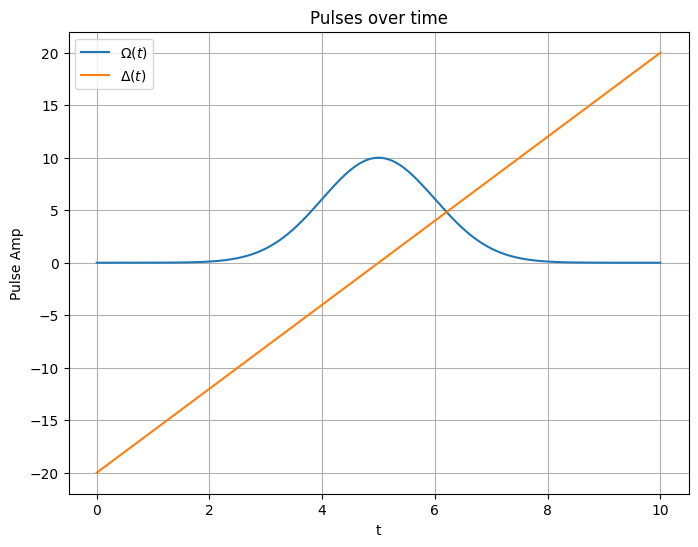

In [2]:
# defining time dependant coefs
T = 10
t = np.linspace(0, T, 1000)
sigma = 1
omega_max = 10
omega_t = omega_max * np.exp(-0.5 * ((t - T/2) / sigma) ** 2)
delta_t = 2*omega_max*(t / (T/2) - 1)

# Plot the wave
plt.figure(figsize=(8, 6))
plt.plot(t, omega_t, label=r'$\Omega(t)$')
plt.plot(t, delta_t, label=r'$\Delta(t)$')
plt.xlabel("t")
plt.ylabel("Pulse Amp")
plt.grid(True)
plt.legend()
plt.title("Pulses over time")


# Defining Stabilizers for 4-qubit code

In [3]:
I = qeye(2)
X = sigmax()
Y = sigmay()
Z = sigmaz()

# Define the stabilizer generators for the 5-qubit bit-flip code
g1 = tensor(X, X, X, X)
g2 = tensor(Z, Z, Z, Z)
g3 = tensor(X, Y, Z, I)

stabilizers = [
    g1,
    g2,
    g3
]

X_L = tensor(Y, I, Y, I)
Z_L = tensor(Z, Z, I, I)
Y_L = -tensor(I, X, X, I)


In [4]:
T = 10
t = np.linspace(0, T, 1000)
sigma = 1
omega_max = 15
omega_t = omega_max * np.exp(-0.5 * ((t - T/2) / sigma) ** 2)
delta_t = 2*omega_max*(t / (T/2) - 1)

logical_zero = basis(2, 0)
logical_one = basis(2, 1)

one_eigens = []
zero_eigens = []

for i, t_step in enumerate(t):
    H_S = omega_t[i] * X + delta_t[i] * Z
    eigenvalues, eigenstates = H_S.eigenstates()
    
    for energy, state in zip(eigenvalues, eigenstates):        
        proj_zero = np.round(np.abs(logical_zero.overlap(state))**2)
        proj_one = np.round(np.abs(logical_one.overlap(state))**2)
        if proj_zero:
            zero_eigens.append(energy)
        if proj_one:
            one_eigens.append(energy)



plt.figure(figsize=(8, 6))
plt.plot(t, one_eigens, color='b', linewidth=4)
plt.plot(t, zero_eigens, color='r', linewidth=4)
plt.xlabel('t', size=22)
plt.ylabel('Energy', size=22)
plt.title(r'Energy Spectrum RAP - Single Qubit', size=24)

plt.tick_params(axis='both', which='major', labelsize=18)  # Change major ticks
plt.rcParams["font.family"] = "Times New Roman"

# plt.grid(True)
# plt.show()
plt.savefig("1qubit_e_gap.svg", format="svg", dpi=300)
plt.close()

In [5]:
basis_states = [basis(2, 0), basis(2, 1)]

# Define the logical zero state |0_L>
logical_zero = (tensor(basis_states[0], basis_states[0], basis_states[0], basis_states[0]) +
                1j*tensor(basis_states[0], basis_states[0], basis_states[1], basis_states[1]) +
                1j*tensor(basis_states[1], basis_states[1], basis_states[0], basis_states[0]) +
                tensor(basis_states[1], basis_states[1], basis_states[1], basis_states[1])).unit()

logical_one = X_L * logical_zero

# Applying error
# error = tensor(I, X, I, X)
# logical_zero = error * logical_zero
# logical_one = error * logical_one

# Define projection operators
P0 = logical_zero * logical_zero.dag()
P1 = logical_one * logical_one.dag()
P_tot = P0 + P1

-300 1.0 0.0
-300 0.0 1.0
-100 0.0 0.0
-100 0.0 0.0
-100 0.0 0.0
-100 0.0 0.0
-100 0.0 0.0
-100 0.0 0.0
100 0.0 0.0
100 0.0 0.0
100 0.0 0.0
100 0.0 0.0
100 0.0 0.0
100 0.0 0.0
300 0.0 0.0
300 0.0 0.0
{-300: 2, -100: 6, 100: 6, 300: 2}


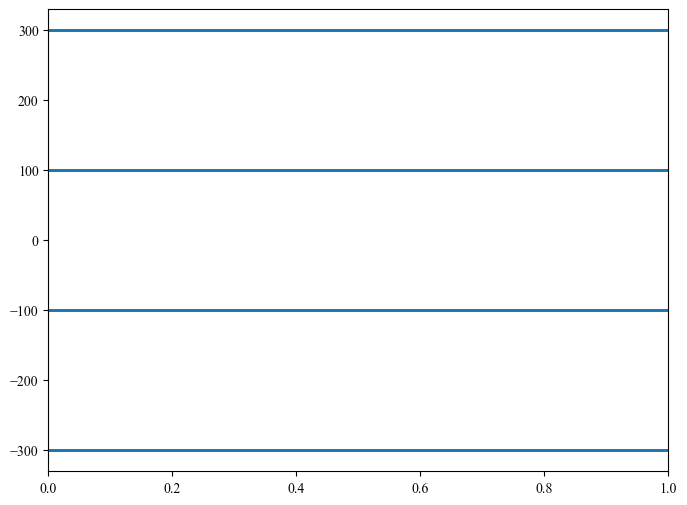

In [6]:
Ep = 100
Hp = -Ep*(g1 + g2 + g3)

eigenvalues, eigenstates = Hp.eigenstates()

energies = {}
colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'magenta', 'yellow', 'lime', 'teal', 'gold', 'navy'
]

plt.figure(figsize=(8, 6))

# Loop through both arrays
for energy, state in zip(eigenvalues, eigenstates):
    energy = int(np.round(energy, 1))
    
    if energy not in energies.keys():
        energies[energy] = 1
    else:
        energies[energy] += 1    
    plt.axhline(y = energy, linestyle = '-', linewidth = 2)
    
    proj_zero = np.abs(logical_zero.overlap(state))**2
    proj_one = np.abs(logical_one.overlap(state))**2

    print(energy, np.round(proj_zero), np.round(proj_one))
print(energies)

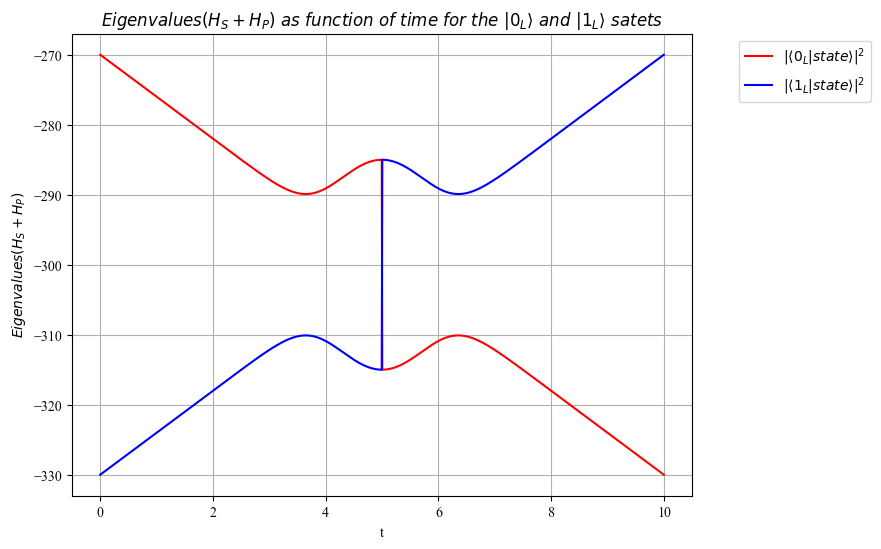

In [7]:
one_eigens = []
zero_eigens = []

for i, t_step in enumerate(t):
    H_S = omega_t[i] * X_L + delta_t[i] * Z_L + Hp
    eigenvalues, eigenstates = H_S.eigenstates()
    
    for energy, state in zip(eigenvalues, eigenstates):        
        proj_zero = np.round(np.abs(logical_zero.overlap(state))**2)
        proj_one = np.round(np.abs(logical_one.overlap(state))**2)
        if proj_zero:
            zero_eigens.append(energy)
        if proj_one:
            one_eigens.append(energy)

plt.figure(figsize=(8, 6))
plt.plot(t, one_eigens, color='r', label =r'$| \langle 0_{L} | state \rangle | ^{2}$')
plt.plot(t, zero_eigens, color='b', label =r'$| \langle 1_{L} | state \rangle | ^{2}$')
plt.xlabel('t')
plt.ylabel(r'$Eigenvalues(H_{S} + H_{P})$')
plt.title(r'$Eigenvalues(H_{S} + H_{P}) \ as \ function \ of \ time \ for \ the \ |0_{L} \rangle \ and \ |1_{L} \rangle \ satets$')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)

# Ploting the full energy diagram

In [8]:
Ep = 50
Hp = -Ep*(g1 + g2 + g3)

T = 10
t = np.linspace(0, T, 1000)
sigma = 1
omega_max = 15
omega_t = omega_max * np.exp(-0.5 * ((t - T/2) / sigma) ** 2)
delta_t = 2*omega_max*(t / (T/2) - 1)

In [12]:
# Calculate the initial Hamiltonian eigenstates
H_S_0 = omega_t[0] * X_L + delta_t[0] * Z_L + Hp
eigenvalues_0, eigenstates_0 = H_S_0.eigenstates()

# Initialize storage for the first two eigenstates and the rest
states = {index: [eigenvalues_0[index]] for index in range(len(eigenvalues_0))}

# Loop through time steps
for t_step in range(1, len(t)):
    H_S = omega_t[t_step] * X_L + delta_t[t_step] * Z_L + Hp
    eigenvalues, eigenstates = H_S.eigenstates()

    # Handle the first two eigenstates with overlap matching
    for state_index in range(2):  # Restrict to the first two eigenstates of H_S_0
        state_0 = eigenstates_0[state_index]
        max_overlap = 0
        best_match_index = 0
        
        for i, state_t in enumerate(eigenstates):
            proj = np.abs(state_0.overlap(state_t))**2
            if proj > max_overlap:
                max_overlap = proj
                best_match_index = i

        # Append the best matching eigenvalue for the first two eigenstates
        states[state_index].append(eigenvalues[best_match_index])

    # For the remaining eigenstates, just append their eigenvalues directly
    for state_index in range(2, len(eigenvalues)):
        states[state_index].append(eigenvalues[state_index])

colors = ['red', 'blue']
plt.figure(figsize=(8, 10))
for state_index, energies in states.items():
    if state_index < 2:  # Highlight the first two eigenstates
        plt.plot(t, energies, color=colors[state_index % len(colors)], linewidth=1.5)
    else:  # Plot the rest as regular
        plt.plot(t, energies, linestyle='dashed', color='black', linewidth=1)

# Finalize the plot
# plt.xlabel('t', size=22)
# plt.ylabel('Energy', size=22)
# plt.title(r'Energy Spectrum RAP - 4-Qubit', size=24)
# plt.grid()
plt.rcParams["font.family"] = "Times New Roman"

plt.tick_params(axis='both', which='major', labelsize=18)  # Change major ticks
# plt.show()
plt.savefig("4qubit_e_gap.svg", format="svg", dpi=300)
plt.close()

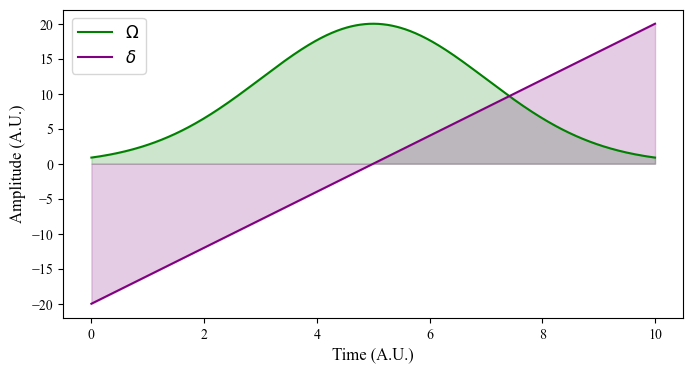

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Configure the font globally
plt.rcParams["font.family"] = "Times New Roman"

# Generate x values
x = np.linspace(0, 10, 500)
omega_max = 20
T = 10  # Total time
sigma = 2  # Standard deviation for the Gaussian pulse

# Define the functions
Omega = omega_max * np.exp(-0.5 * ((x - T / 2) / sigma) ** 2)
Delta = omega_max * (x / (T / 2) - 1)

# Create the plot
plt.figure(figsize=(8, 4))

# Plot the curves
plt.plot(x, Omega, color='green', label=r'$\Omega$')
plt.plot(x, Delta, color='purple', label=r'$\delta$')

# Fill the shaded regions
plt.fill_between(x, 0, Omega, color='green', alpha=0.2)
plt.fill_between(x, 0, Delta, color='purple', alpha=0.2)

# Add labels and legend
plt.xlabel("Time (A.U.)", fontsize=12)
plt.ylabel("Amplitude (A.U.)", fontsize=12)
plt.legend(fontsize=12)

# Save the plot
# plt.savefig("pulses.svg", format="svg", dpi=300)
plt.show()

Solving the master equation for an open system
$$
\frac{d\rho}{dt} = -i[H_{S}, \rho] - \sum_{a,b} M_{ab}\mathcal{E}_{ab}
$$

Where 

$$
H_{S} = H_{SL} + H_{SP}
$$

- $ H_{SL} $ is the Logic Hamiltonian for the adiabatic calculation.
- $ H_{SP} $ is the sum of penalty terms.

$$ 
$H_{SL}(t) = \Omega(t)X_{L}^{\otimes n} + \Delta(t)Z_{L}^{\otimes n}$
$$
$$ 
H_{SP}(t) = -E_{P} \sum_{k} g_k
$$

and 

$$
M_{ab} = \sum_i \left[N_{ba}|g_{ba}|^2 \langle a|\sigma^{(i)}_{-} |b\rangle \langle b| \sigma^{(i)}_{+} |a\rangle + (N_{ab} + 1)|g_{ab}|^2 \langle b|\sigma^{(i)}_{-} |a\rangle h_a \sigma^{(i)}_{+} |b\rangle \right]
$$
$$
\mathcal{E}_{ab}(\rho) = |a\rangle \langle a| \rho + \rho |a\rangle \langle a| - 2 |b\rangle \langle a| \rho |a\rangle \langle b|
$$

This is just a const and we assume $N_{ba} = \frac{1}{\exp[\beta(\omega_b - \omega_a)] - 1} = 0$ , so we claim $M_{ab} = \sqrt{\gamma_{n}}$

If we denote $|b\rangle \langle a| = A_{n}$ so $|a\rangle \langle b| = A_{n}^{\dagger}$, and lets denote $C_n = \sqrt{\gamma_n} A_{n}$ are the collapse operators.

the first equation $\frac{d\rho}{dt} = -i[H_{S}, \rho] - \sum_{a,b} M_{ab}\mathcal{E}_{ab}$ gets the form 

$$
\frac{d\rho}{dt} = -i[H_{S}, \rho] - \sum_{a,b} M_{ab}\mathcal{E}_{ab} = -i[H_{S}, \rho] + \sum_{n} \frac{1}{2}[2C_{n}\rho(t) C_{n}^{\dagger} - \rho(t)C_{n}^{\dagger} C_{n} - C_{n}^{\dagger} C_{n}\rho(t)]
$$

Here I'm trying to calculate 

$$
M_{0b} = \sum_{i} N_{b0} |g_{b0}|^2 \langle 0 | \sigma^{(i)}_{-} | b \rangle \langle b | \sigma^{(i)}_{+} | 0 \rangle.
$$

without considering the $N_{b0} |g_{b0}|^2$ parts. $|b \rangle \in C^{\perp}$ so I am assuming $|b\rangle = |1_{L}\rangle$

There is an odd behavior for $Ep=100$

In [9]:
def bose_einstein_distribution(energy_diff, temperature):
    if temperature == 0:
        return 0
    return 1 / (np.exp(energy_diff / (temperature)) - 1)

def gab(omega1, omega2, lambda_2):
    if omega1 >= omega2:
        return 0
    return np.sqrt(lambda_2)
    
def c_ops_gen(t, args):
    """
    Robustness of adiabatic quantum computation - from this paper
    :param t: time parameter 
    :param args: dictionary of optional arguments
    :return: a matrix of the collapse operator
    """
    H_inst_t = args['args_H'](t)  # Instantaneous Hamiltonian at time t
    eigenvalues, eigenstates = H_inst_t.eigenstates()
    
    sigmam_i = args['sigma_i']
    
    # Initialize a single collapse operator for this qubit
    collapse_op = Qobj(np.zeros_like(sigmam_i.full()), dims=sigmam_i.dims)
    
    for omega_a, a in zip(eigenvalues, eigenstates):
        for omega_b, b in zip(eigenvalues, eigenstates):
            if np.abs(omega_a - omega_b) < 1e-6:
                continue  # Skip nearly degenerate states
            
            # For decay transitions (omega_b > omega_a)
            if omega_b > omega_a:
                Nba = bose_einstein_distribution(omega_b - omega_a, args['T'])
                g_ba = gab(omega_a, omega_b, args['lambda_2'])
                
                ma_ba = a.dag() * sigmam_i * b * b.dag() * sigmam_i.dag() * a
                
                decay_op = np.sqrt(Nba * (g_ba ** 2) * ma_ba) * (b * a.dag())
                collapse_op += decay_op

            # For excitation transitions (omega_a > omega_b)
            elif omega_a > omega_b:
                Nab = bose_einstein_distribution(omega_a - omega_b, args['T'])
                g_ab = gab(omega_b, omega_a, args['lambda_2'])
                
                ma_ab = b.dag() * sigmam_i * a * a.dag() * sigmam_i.dag() * b
                
                excitation_op = np.sqrt((Nab + 1) * (g_ab ** 2) * ma_ab) * (b * a.dag())

                collapse_op += excitation_op
    # print(collapse_op)
    return collapse_op

In [4]:
start_time = time.time()

n_qubits = 4
max_time = 10
times = np.linspace(0, max_time, 50)
sigma = 1
omega_max = 10

# Time-dependent functions
omega_t = lambda t: omega_max * np.exp(-0.5 * ((t - max_time/2) / sigma) ** 2)    
delta_t = lambda t: 2 * omega_max * (t / (max_time / 2) - 1)


T = 100 # temp
# Eps = [1, 50, 80, 100, 110, 150]
# Eps = [1, 50, 100, 150, 300]
Eps = [20]
gamma_sqrt = 0.1

# Assuming logical_zero and logical_one are properly defined Qobjs
rho0 = logical_zero * logical_zero.dag()
rho1 = logical_one * logical_one.dag()

e_ops = [rho0, rho1]
plt.figure(figsize=(8, 6))

# Loop over different values of Ep
for Ep in Eps:
    print("working on Ep:", Ep)
    Hp = -Ep * (g1 + g2 + g3)  # Assuming g1, g2, g3 are defined Qobj terms
    
    # Time-dependent Hamiltonian
    def H_t(t):
        return omega_t(t) * X_L + delta_t(t) * Z_L + Hp  # Assuming H_x and H_z are valid Qobjs
    

    # H_t = [[X_L,omega_t], [Z_L, delta_t], Hp]
    args_C = {"H": H_t,
              "n_qubits": n_qubits,
              "lambda_2": gamma_sqrt,
              "T": T}


    c_ops_s = []
    for i in range(n_qubits):
        args_C = {"args_H": H_t,
                  "n_qubits": n_qubits,
                  "lambda_2":gamma_sqrt,
                  "T":T,
                  "sigma_i": Qobj(tensor([sigmam() if j == i else I for j in range(n_qubits)]).data, dims=Hp.dims)
                 }
        c_ops_i = QobjEvo(c_ops_gen, args=args_C)
        c_ops_s.append(c_ops_i)
        # c_ops_s.append(lambda t: c_ops_gen(t, args_C))

    # Solve the master equation
    results = mesolve(H_t, rho0, times, c_ops=c_ops_s, e_ops=e_ops,
                      options={'nsteps': 1e5})
    # , options={'nsteps': 100000, 'atol': 1e-2}
    
    # Plotting results
    plt.plot(times, results.expect[0], label=r"$\rho_0$"+f", Ep={Ep}")
    plt.plot(times, results.expect[1], label=r"$\rho_1$"+f", Ep={Ep}")


# Stop the timer
end_time = time.time()
runtime = end_time - start_time

plt.grid()
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Population Evolution ' + 
          r"$\langle\varphi|\rho_{0/1}(t)|\varphi\rangle$" + 
          ' of Each Logical Qubits Over Time with Dissipation' + 
          f" - Temp = {T} - " + 
          f"gamma = {gamma_sqrt} - " +
          f"runtime = {max_time} - " + 
          f"(Runtime: {runtime:.2f} seconds)")
plt.show()

NameError: name 'sigmax' is not defined